<a id = "1.0"></a>
<p style="font-size:25px;color:#16268a;font-family:'Comic Sans MS';text-align:center;border-radius:5px;">
<strong>Incremental PCA. Scikit Web</strong></p>

<a id = "1.0"></a>
<p style="font-size:17px;color:#16268a;font-family:'Comic Sans MS';text-align:left;border-radius:5px;">
<strong>El análisis de componentes principales incrementales (PCA) se utiliza como reemplazo para el análisis de componentes principales (PCA) cuando el conjunto de datos que se va a descomponer es demasiado grande para entrar en memoria.</strong></p>

<a id = "1.0"></a>
<p style="font-size:12px;color:#16268a;font-family:'Avantgarde';text-align:right;border-radius:5px;">
<strong>
<a href="https://stackoverflow.com/questions/31428581/incremental-pca-on-big-data" target=\"_blank\">Stackoverflow: Incremental PCA on big data</a>
</strong></p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

<a id = "1.0"></a>
<p style="font-size:17px;color:#16268a;font-family:'Avantgarde';text-align:left;border-radius:5px;">
<strong>Parametros</strong>:<BR>
<strong>n_components</strong>, default=None. Number of components to keep.<BR><BR>
<strong>whiten</strong>, default=False. When True (False by default) the components_vectors are divided by n_samples times components_to ensure uncorrelated outputs with unit component-wise variances.<BR><BR>
<strong>copy</strong>, default=True. If False, X will be overwritten. copy=False can be used to save memory but is unsafe for general use.<BR><BR>
<strong>batch_size</strong>, default=None. The number of samples to use for each batch. Only used when calling fit. If batch_size is None, then batch_size is inferred from the data and set to 5 * n_features, to provide a balance between approximation accuracy and memory consumption.</p>

In [3]:
n_components = 2

In [4]:
ipca = IncrementalPCA(n_components=n_components, batch_size=10)

In [5]:
X_ipca = ipca.fit_transform(X)

In [6]:
pca = PCA(n_components=n_components)

In [7]:
X_pca = pca.fit_transform(X)

In [8]:
colors = ['navy', 'turquoise', 'darkorange']

In [9]:
for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

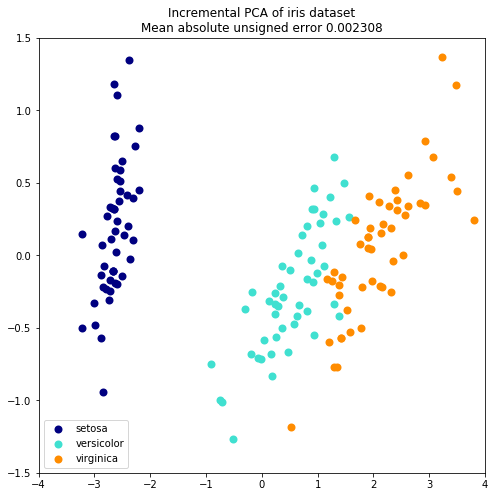

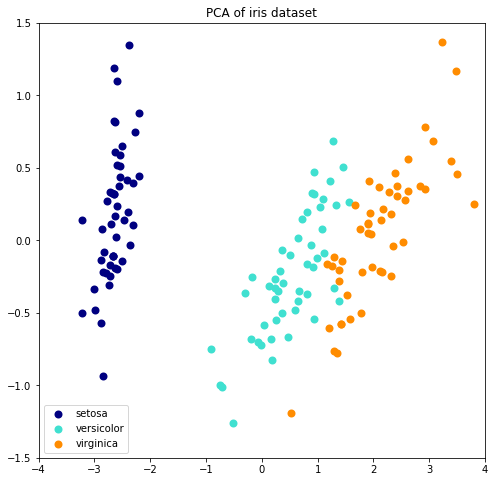

In [10]:
plt.show()

<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>_____________________________________________________________</strong></p> 